# 1. Import library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas.util.testing as tm

# for Q-Q plots
import pylab
import scipy.stats as stats

# boston house dataset for the demo
from sklearn.datasets import load_boston

# import several machine learning algorithms
# Classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
#from lightgbm import LGBMClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
#from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
# Evaluation metrics for Classification
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, classification_report, roc_auc_score, roc_curve, precision_recall_curve, average_precision_score

# Regression
from sklearn.linear_model import LinearRegression,Ridge,Lasso,RidgeCV,ElasticNet,LogisticRegression
from sklearn.ensemble import RandomForestRegressor,BaggingRegressor,GradientBoostingRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
#from xgboost import XGBRegressor
# Evaluation metrics for Regression 
from sklearn.metrics import mean_squared_log_error, mean_squared_error, r2_score, mean_absolute_error
from sklearn.metrics import (confusion_matrix, classification_report, accuracy_score, roc_auc_score, auc,
                             precision_score, recall_score, roc_curve, precision_recall_curve,
                             precision_recall_fscore_support, f1_score,
                             precision_recall_fscore_support)

# to scale the features
from sklearn.preprocessing import MinMaxScaler

# to evaluate the models
from sklearn.metrics import roc_auc_score

# to separate data into train and test
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFECV
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score, ShuffleSplit, cross_validate
from sklearn import model_selection
from sklearn.model_selection import train_test_split


pd.options.display.max_columns = None
pd.options.display.max_rows = None

# Supress warnings
import warnings
warnings.filterwarnings("ignore")

# display various ranges 
pd.options.display.float_format = '{:.4f}'.format

print("Setup complete...")

Setup complete...


----------------------------------------------------------------------

# 2. Import dataset

### 2.1 Lending Club

In [3]:
df1 = pd.read_csv('loan.csv')
print(df1.shape)
df1.head()

(2260668, 145)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,nan,nan,2500,2500,2500.0000,36 months,13.5600,84.9200,C,C1,Chef,10+ years,RENT,55000.0000,Not Verified,Dec-2018,Current,n,nan,NaN,debt_consolidation,Debt consolidation,109xx,NY,18.2400,0.0000,Apr-2001,1.0000,nan,45.0000,9.0000,1.0000,4341,10.3000,34.0000,w,2386.0200,2386.0200,167.0200,167.0200,113.9800,53.0400,0.0000,0.0000,0.0000,Feb-2019,84.9200,Mar-2019,Feb-2019,0.0000,nan,1,Individual,nan,nan,NaN,0.0000,0.0000,16901.0000,2.0000,2.0000,1.0000,2.0000,2.0000,12560.0000,69.0000,2.0000,7.0000,2137.0000,28.0000,42000.0000,1.0000,11.0000,2.0000,9.0000,1878.0000,34360.0000,5.9000,0.0000,0.0000,140.0000,212.0000,1.0000,1.0000,0.0000,1.0000,nan,2.0000,nan,0.0000,2.0000,5.0000,3.0000,3.0000,16.0000,7.0000,18.0000,5.0000,9.0000,0.0000,0.0000,0.0000,3.0000,100.0000,0.0000,1.0000,0.0000,60124.0000,16901.0000,36500.0000,18124.0000,nan,NaN,nan,nan,nan,nan,nan,nan,nan,nan,nan,N,NaN,NaN,NaN,nan,nan,NaN,NaN,NaN,nan,nan,NaN,nan,nan,nan,Cash,N,NaN,NaN,NaN,nan,nan,nan
1,nan,nan,30000,30000,30000.0000,60 months,18.9400,777.2300,D,D2,Postmaster,10+ years,MORTGAGE,90000.0000,Source Verified,Dec-2018,Current,n,nan,NaN,debt_consolidation,Debt consolidation,713xx,LA,26.5200,0.0000,Jun-1987,0.0000,71.0000,75.0000,13.0000,1.0000,12315,24.2000,44.0000,w,29387.7500,29387.7500,1507.1100,1507.1100,612.2500,894.8600,0.0000,0.0000,0.0000,Feb-2019,777.2300,Mar-2019,Feb-2019,0.0000,nan,1,Individual,nan,nan,NaN,0.0000,1208.0000,321915.0000,4.0000,4.0000,2.0000,3.0000,3.0000,87153.0000,88.0000,4.0000,5.0000,998.0000,57.0000,50800.0000,2.0000,15.0000,2.0000,10.0000,24763.0000,13761.0000,8.3000,0.0000,0.0000,163.0000,378.0000,4.0000,3.0000,3.0000,4.0000,nan,4.0000,nan,0.0000,2.0000,4.0000,4.0000,9.0000,

### 2.2. Titanic

In [4]:
df2 = pd.read_csv('Train_Titanic.csv')
print(df2.shape)
df2.head()

(891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0000,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0000,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0000,0,0,373450,8.0500,NaN,S


### 2.3 House price

In [5]:
df3 = pd.read_csv('houseprice.csv')
print(df3.shape)
df3.head()

(1460, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0000,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0000,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0000,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0000,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0000,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0000,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0000,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0000,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0000,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0000,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0000,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0000,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0000,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0000,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0000,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### 2.4. Boston house price

In [6]:
boston_dataset = load_boston()
df4 = pd.DataFrame(boston_dataset.data,columns=boston_dataset.feature_names)
print(df4.shape)
df4.head()

(506, 13)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.0063,18.0000,2.3100,0.0000,0.5380,6.5750,65.2000,4.0900,1.0000,296.0000,15.3000,396.9000,4.9800
1,0.0273,0.0000,7.0700,0.0000,0.4690,6.4210,78.9000,4.9671,2.0000,242.0000,17.8000,396.9000,9.1400
2,0.0273,0.0000,7.0700,0.0000,0.4690,7.1850,61.1000,4.9671,2.0000,242.0000,17.8000,392.8300,4.0300
3,0.0324,0.0000,2.1800,0.0000,0.4580,6.9980,45.8000,6.0622,3.0000,222.0000,18.7000,394.6300,2.9400
4,0.0691,0.0000,2.1800,0.0000,0.4580,7.1470,54.2000,6.0622,3.0000,222.0000,18.7000,396.9000,5.3300


In [29]:
org_df1 = df1.copy()
org_df2 = df2.copy()
org_df3 = df3.copy()
org_df4 = df4.copy()

----------------------------------------------------------------------

# 4. Variable Transformation

## 4.1. Gaussian Transformation for Num vars

Some machine learning models like **linear and logistic regression** assume that the variables are normally distributed. Others benefit from "Gaussian-like" distributions, as in such distributions the observations of X available to predict Y vary across a greater range of values. Thus, Gaussian distributed variables may boost the machine learning algorithm performance.

If a variable is not normally distributed, sometimes it is possible to find a mathematical transformation so that the transformed variable is Gaussian.


#### How can we transform variables so that they follow a Gaussian distribution?

There are a few straightforward methods to transform variables so that they follow a Gaussian distribution. None of them is better than the other, they rather depend on the original distribution of the variables. They are:

- logarithmic transformation
- reciprocal transformation
- square root transformation
- exponential transformation (more general, you can use any exponent)
- boxcox transformation

To understand how the **boxcox** transformation works, please refer to these links:
- http://www.statisticshowto.com/box-cox-transformation/
- http://www.itl.nist.gov/div898/handbook/eda/section3/eda336.htm
- http://onlinestatbook.com/2/transformations/box-cox.html


In this notebook I will demonstrate all the transformations on the same variables for comparison, using the titanic dataset.

### 4.1.1. Titanic dataset

In [38]:
df2 = org_df2.copy()
usecols = ['Age', 'Fare', 'Survived']
df2[usecols].head()

,Age,Fare,Survived
0,22.0000,7.2500,0
1,38.0000,71.2833,1
2,26.0000,7.9250,1
3,35.0000,53.1000,1
4,35.0000,8.0500,0


#### Fill missing data with random sample

In [27]:
# first I will fill the missing data of the variable age, with a random sample of the variable

def impute_na(data, variable):
    # function to fill na with a random sample
    df = data.copy()
    
    # random sampling
    df[variable+'_random'] = df[variable]
    
    # extract the random sample to fill the na
    random_sample = df[variable].dropna().sample(df[variable].isnull().sum(), random_state=0)
    
    # pandas needs to have the same index in order to merge datasets
    random_sample.index = df[df[variable].isnull()].index
    df.loc[df[variable].isnull(), variable+'_random'] = random_sample
    
    return df[variable+'_random']

In [40]:
# fill na
df2['Age'] = impute_na(df2, 'Age')
df2.Age.isnull().sum()

0

### 4.1.2. Age

#### Examine original distribution

To visualise the distribution of the variable, Age in this case, we plot a histogram to visualise a bell-shape, and the Q-Qplot. Remember that if the variable is normally distributed, we should see a 45 degree straight line of the values over the theoretical quantiles. See the lecture "Variable Distribution" on section 4 for a description of Q-Q plots.

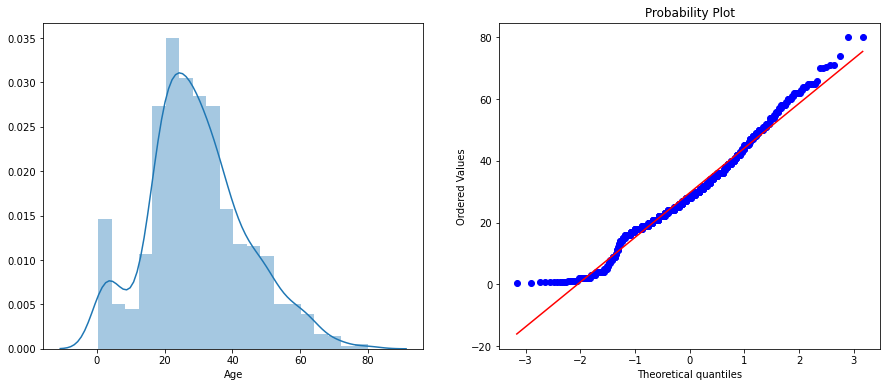

In [43]:
# plot the histograms to have a quick look at the distributions
# we can plot Q-Q plots to visualise if the variable is normally distributed

def diagnostic_plots(df, variable):
    # function to plot a histogram and a Q-Q plot
    # side by side, for a certain variable
    
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    sns.distplot(df[variable], kde=True, bins=20)

    plt.subplot(1, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=pylab)

    plt.show()
    
diagnostic_plots(df2, 'Age')

The variable Age is almost normally distributed, except for some observations on the lower value tail of the distribution. Note the slight skew to the left in the histogram, and the deviation from the straight line towards the lower values ont he Q-Q- plot. In the following cells, I will apply the above mentioned transformations and compare the distributions of the transformed Age.

#### Logarithmic transformation

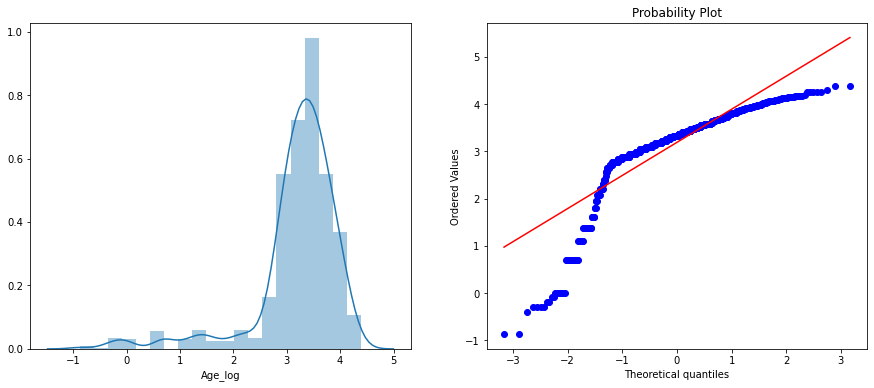

In [45]:
### Logarithmic transformation
df2['Age_log'] = np.log(df2.Age)

diagnostic_plots(df2, 'Age_log')

The logarithmic transformation, did not render a Gaussian like distribution for Age.

#### Reciprocal transformation

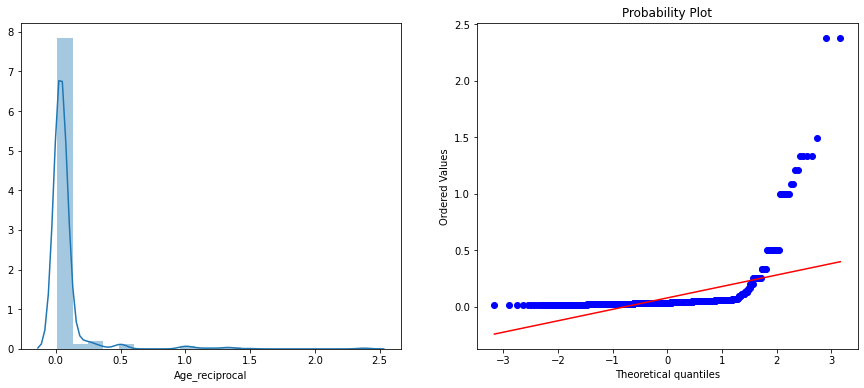

In [46]:
### Reciprocal transformation
df2['Age_reciprocal'] = 1 / df2.Age

diagnostic_plots(df2, 'Age_reciprocal')

The reciprocal transformation was also not useful to transform Age into a variable normally distributed.

#### Square root transformation

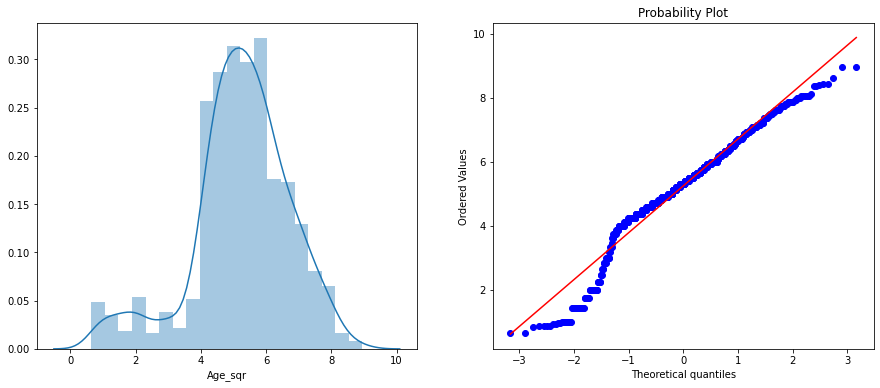

In [47]:
df2['Age_sqr'] = df2.Age**(1/2)

diagnostic_plots(df2, 'Age_sqr')

The square root transformation is a bit more succesful that the previous2 transformations, however, the variable is still not Gaussian, and this does not represent an improvement towards normality respect the original distribution of Age.

#### Exponential

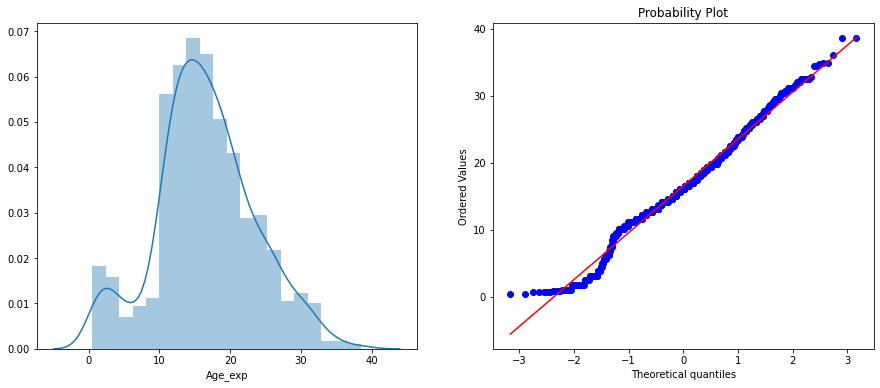

In [48]:
df2['Age_exp'] = df2.Age**(1/1.2) # you can vary the exponent as needed

diagnostic_plots(df2, 'Age_exp')

The exponential transformation is the best of all the transformations above, at the time of generating a variable that is normally distributed. Comparing the histogram and Q-Q plot of the exponentially transformed Age with the original distribution, I would say that by visual inspection the transformed variable follows more closely a Gaussian distribution. 

***Should I transform the variable?***

It depends on what we are trying to achieve. If this was a situation in a business setting, I would use the original variable without transformation to train the model, as this would represent a simpler situation at the time of asking developers to implement the model in real life, and also it will be easier to interpret. If on the other hand this was an exercise to win a data science competition, I would opt to use the variable that gives me the highest performance.

#### BoxCox transformation

The Box-Cox transformation is defined as: 

T(Y)=(Y exp(λ)−1)/λ

where Y is the response variable and λ is the transformation parameter. λ varies from -5 to 5. In the transformation, all values of λ  are considered and the optimal value for a given variable is selected.

Briefly, for each  λ (the transformation tests several λs), the correlation coefficient of the Probability Plot (Q-Q plot below, correlation between ordered values and theoretical quantiles) is calculated. 

The value of λ corresponding to the maximum correlation on the plot is then the optimal choice for λ.

In python, we can evaluate and obtain the best λ with the stats.boxcox function from the package scipy.

Let's have a look.

Optimal λ:  0.7648522500282625


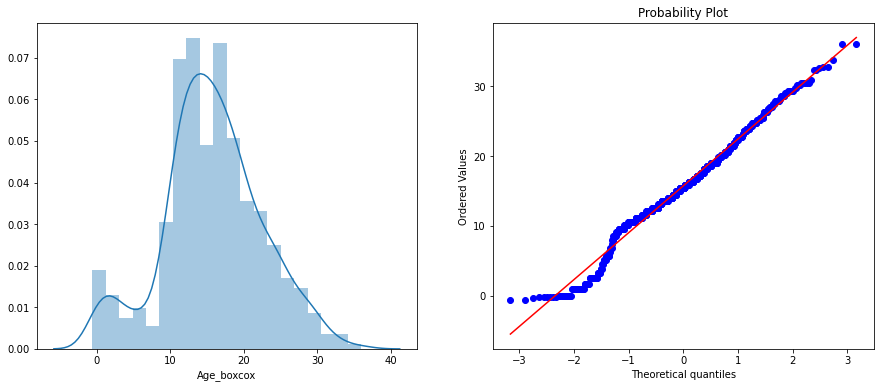

In [50]:
df2['Age_boxcox'], param = stats.boxcox(df2.Age) 

print('Optimal λ: ', param)

diagnostic_plots(df2, 'Age_boxcox')

The Box Cox transformation was as good as the exponential transformation we performed above to make Age look more Gaussian. Whether we decide to proceed with the original variable or the transformed variable, will depend of the purpose of the exercise as described above.

### 4.1.3. Fare

#### Original distribution

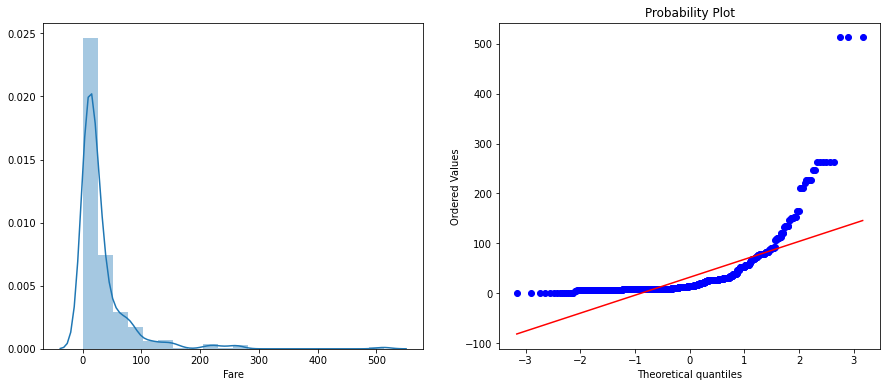

In [52]:
diagnostic_plots(df2, 'Fare')

The variable Fare is very skewed, with the majority of the values accumulated on the lower Fare range, and just a few observations who paid a high Fare to get on the Titanic. As expected, in the Q-Q plot we observe a big deviation of the observed data from the 45 degree red line.

#### Logarithmic transformation

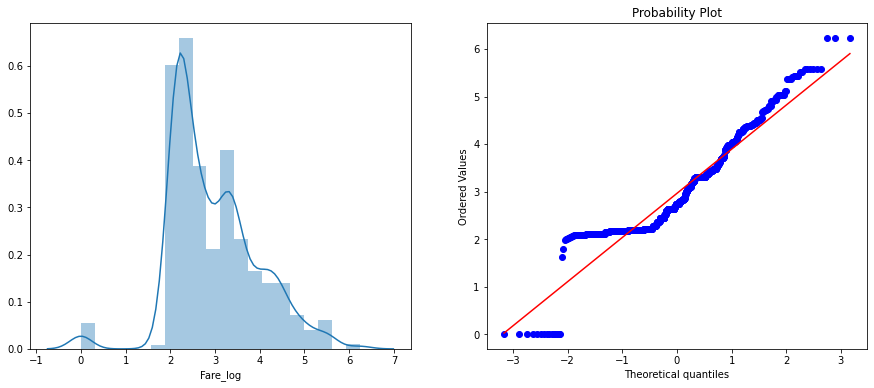

In [53]:
### Logarithmic transformation
df2['Fare_log'] = np.log(df2.Fare+1) # We don't want log of 0

diagnostic_plots(df2, 'Fare_log')

The logarithmic transformation does a good job to make the variable Fare look more Gaussian. The histogram still shows signs of skewness and some observations deviate from the 45 degree line on the Q-Q plot, but by all means it is much more Gaussian looking than the original variable.

#### Reciprocal transformation

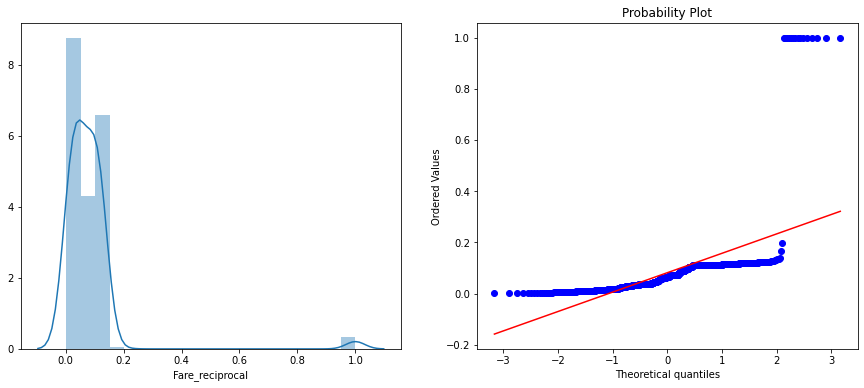

In [54]:
### Reciprocal transformation
df2['Fare_reciprocal'] = 1 / (df2.Fare+1)

diagnostic_plots(df2, 'Fare_reciprocal')

The reciprocal transformation, on the other hand, is not useful to make Fare less skewed.

#### Square root

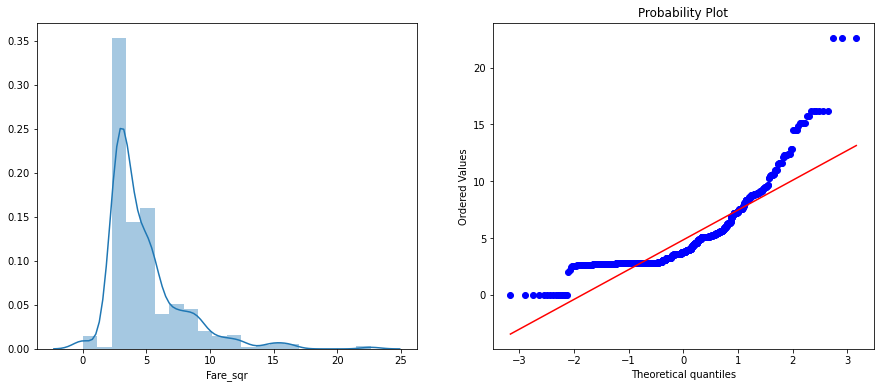

In [55]:
df2['Fare_sqr'] =df2.Fare**(1/2)

diagnostic_plots(df2, 'Fare_sqr')

The square root transformation is not useful to make Fare more Gaussian looking.

#### Exponential

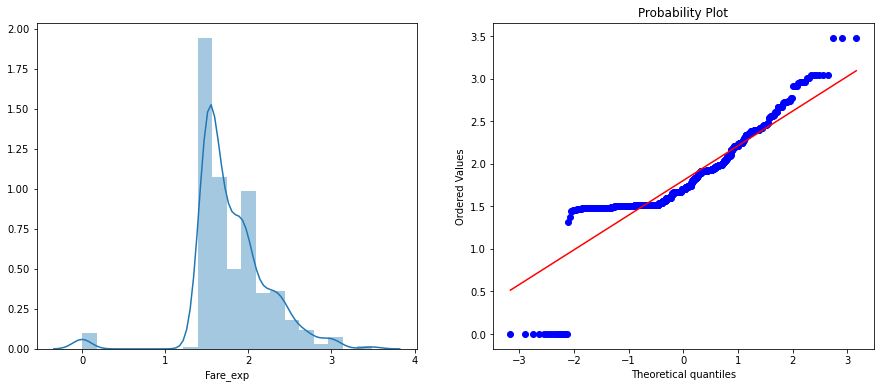

In [56]:
df2['Fare_exp'] =df2.Fare**(1/5)

diagnostic_plots(df2, 'Fare_exp')

The exponential transformation works better than the last 2, perhaps as well as the logarithmic transformation.


#### BoxCox

Optimal lambda:  -0.09778702818680361


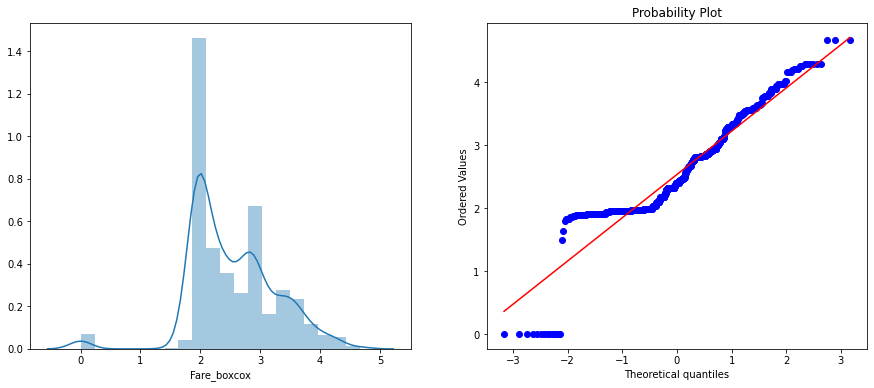

In [57]:
df2['Fare_boxcox'], param = stats.boxcox(df2.Fare+1) # you can vary the exponent as needed

print('Optimal lambda: ', param)

diagnostic_plots(df2, 'Fare_boxcox')

We can see that after the transformation, the quantiles are somewhat more aligned over the 45 degree line with the theoreical quantiles of the Gaussian distribution.

#### Summary

For Fare, we could use the logarithmic, exponential or Box-Cox transformation to shape the variable into a transformed version that follows more closely (albeit not perfectly) a normal distribution. It is very likely that this transformation would improve the performance of many machine learning models, respect to using the variable Fare without transformation. Go ahead and test this transformation on a few machine learning algorithms, using the original Fare and the transformed version for comparison.

## 4.2. Engineering Rare Labels / Rare Categories

### 4.2.1. Overview

Rare values are labels/ categories within a categorical variable that are only present for a small percentage of the observations.

There is no rule of thumb to determine how small is a small percentage, but typically, any value below 5% may cause over-fitting in trees.

Rare labels may exist in variables that have intrinsically a huge number of labels, or they can be present in variables with few labels (e.g., 2-10). There is no rule of thumb to determine how many different labels is big (and therefore represent high cardinality) and it will depend as well on how many observations there are in the dataset. In a dataset with 1,000 observations, 100 labels may seem a lot, whereas in a dataset with 100,000 observations it may not be so high.

In situations where rare labels are present in variables with only a few categories, the rare label may be adding some information. On the other hand, in variables with a high number of categories, likely there will be very many labels with a low frequency, which will quite likely add noise instead of information. 

Whether rare labels should be processed before training a machine learning algorithm will depend on the dataset and problem at hand. Ideally, if there are not too many variables, you could try and explore the variables and their categories one at a time, and determine whether the rare labels add noise or information.

If, on the other hand, the dataset has very many categorical variables, and exploring one at a time is not an option you may choose to sacrifice the ideal / optimal performance for a higher delivery speed.

### 4.2.2. Engineering rare labels

There are multiple ways of accounting for rare labels. Some of them handle rare labels at the same time of converting labels into numbers. I will explain those in the section "Engineer labels of categorical variables".

In this section of the course, I will expand on how to **handle rare labels by re-categorising the observation that show rare labels for a certain variable**. These observations can be re-categorised by:

- Replacing the rare label by most frequent label
- Grouping the observations that show rare labels into a unique category (with a new label like 'Rare', or 'Other')

In this and the coming lectures I will explain when it is convenient to use one or the other way of replacing rare values, and evaluate the consequences of replacing rare labels in variables with:

- One predominant category
- A small number of categories
- High cardinality

**Note that grouping infrequent labels or categories under a new category called 'Rare' or 'Other' is the most common practice in machine learning for businesses.**

Specifically, in this lecture I will demonstrate how to work with rare labels in variables with one predominant category using the House Sale dataset from Kaggle.

### 4.2.3. Rare value imputation - important

The identification of rare labels should be done considering only the presence of rare labels in the training set, and then propagated to the test set. This means, rare labels should be identified in the training set. And then, when those are present in the test set as well, they should be replaced, regardless of whether in the test set they are rare or not (i.e., regardless of whether in the test set they are also present in a tiny percentage of the observations or in a high percentage of observations)

In addition, there may be in the test set labels that were not present in the train set. They should be considered rare and preprocessed using the method that was selected to replace rare labels in the training set.

For example, let's imagine that we have in the training set the variable 'city' with the labels 'London', 'Manchester' and 'Yorkshire'. 'Yorkshire' is present in less than 5% of the observations so we decide to replace it by 'London', the most frequent city in the training dataset. In the test set, we should also replace 'Yorkshire' by 'London', regardless of the percentage of observations for 'Yorkshire' or whether 'London' is still the most represented city in the test set.

In addition, if in the test set we find the category 'Milton Keynes', that was not present in the training set, we should also replace that category by London. This is, all categories present in test set, not present in training set, should be treated as rare values and imputed accordingly.

### 4.2.4. Different categorical variable scenarios

Categorical variables may present themselves in a wide variety of different scenarios. Among these, we find variables with:

- One dominating category (most of the observations share the same label)
- A few categories
- High cardinality (a lot of different categories).

### 4.2.5. Functions

Below I will write a few functions to convert categories in categorical variables into numbers so we can use them in sklearn and then to quickly test these variables in a random forest.

#### Split dataset into train set and test set

In [62]:
# let's go ahead and divide dataset into train and test set
df3 = org_df3.copy()
X_train, X_test, y_train, y_test = train_test_split(df3, df3.SalePrice,
                                                    test_size=0.3,
                                                    random_state=0)
X_train.shape, X_test.shape

((1022, 81), (438, 81))

#### Training model

In [63]:
def train_rf(X_train, y_train, X_test, y_test, columns):
    # function to train the random forest
    # and test it on train and test sets
    
    rf = RandomForestRegressor(n_estimators=800, random_state=39)
    
    if type(columns)==str: # if we train using only 1 variable (pass a string instead of list in the "columns" argument of the function)
        rf.fit(X_train[columns].to_frame(), y_train.values)
        pred_train = rf.predict(X_train[columns].to_frame())
        pred_test = rf.predict(X_test[columns].to_frame())
        
    else: # if we train using multiple variables (pass a list in the argument "columns")
        rf.fit(X_train[columns], y_train.values)
        pred_train = rf.predict(X_train[columns])
        pred_test = rf.predict(X_test[columns])
        
    print('Train set')
    print('Random Forests mse: {}'.format(mean_squared_error(y_train, pred_train)))
    print('Test set')
    print('Random Forests mse: {}'.format(mean_squared_error(y_test, pred_test)))

#### Convert categories to numbers

In [66]:
def labels_to_numbers(X_train, X_test, columns):
    # function to encode labels into numbers
    # each label will be assigned an ordinal number from 0 onwards
    
    for col in columns:
        labels_dict = {k:i for i, k in enumerate(X_train[col].unique(), 0)}
        X_train.loc[:, col] = X_train.loc[:, col].map(labels_dict )
        X_test.loc[:, col] = X_test.loc[:, col].map(labels_dict)

In [67]:
labels_dict = {k:i for i, k in enumerate(X_train['Street'].unique(), 0)}
labels_dict

{'Pave': 0, 'Grvl': 1}

#### Let's check that the functions work as desired

In [68]:
# let's inspect the content of the variable Street
X_train['Street'].head()

64      Pave
682     Pave
960     Pave
1384    Pave
1100    Pave
Name: Street, dtype: object

The variable is categorical and the values are strings representing the characteristics of the streets where the houses are located.

In [69]:
# let's inspect the distribution of observations among the different labels

print(X_train.Street.value_counts())
print()
print(X_train.Street.value_counts() / np.float(len(X_train)))

Pave    1017
Grvl       5
Name: Street, dtype: int64

Pave   0.9951
Grvl   0.0049
Name: Street, dtype: float64


In addition, there are only 2 labels in the variable, Pave and Gravel (Grvl) and the majority of the houses are located on "Paved" streets. In situations like this, we say that one category is dominating the variable. Almost the totality of the observations show the same label.

In [70]:
# let's chech that the encoding function works

labels_to_numbers(X_train, X_test, ['Street'])

In [73]:
X_train['Street'].head()

64      0
682     0
960     0
1384    0
1100    0
Name: Street, dtype: int64

In [72]:
# let's check that the random forest training function works

train_rf(X_train, y_train, X_test, y_test, ['Street'])

Train set
Random Forests mse: 6089194757.982905
Test set
Random Forests mse: 6779809835.0570965


Our functions are working appropriately. Go ahead and check the outputs more exhaustively at your own pace, make sure you understand it well.

### 4.2.6. Variables with one dominant category

In [75]:
# let's explore a few examples in which variables have only a few categories, say less than 3

for col in df3.columns:
    if df3[col].dtypes =='O': # if the variable is categorical
        if len(df3[col].unique())<3: # if the variable has less than 3 categories
            print(df3.groupby(col)[col].count()/np.float(len(df3))) # print percentage of observations per category
            print()

Street
Grvl   0.0041
Pave   0.9959
Name: Street, dtype: float64

Utilities
AllPub   0.9993
NoSeWa   0.0007
Name: Utilities, dtype: float64

CentralAir
N   0.0651
Y   0.9349
Name: CentralAir, dtype: float64



In the first 2 variables, Street and Utilities, the  variables show one dominating category which accounts for more than 99% of the observations. In the third variable, the dominating category is present in more than 90% of the observations.

In cases of variables with one dominating category, engineering the rare label is not an option. One needs to choose between whether to use that variable as it is at all or remove it from the dataset. 

These types of variables often are not useful for our predictions, and we should remove them from the set of features that we are going to use to build machine learning models. There are of course exceptions, for example in those cases in which the target is unbalanced, and therefore, the presence of the rare label is indeed informative. The rare label can also be informative in scenarios where the target is not unbalanced.

Therefore, instead of automating a feature engineering pipeline, perhaps it is better to evaluate these variables individually.

### 4.2.7. Variables with few categories

In [77]:
# the columns in the below list have only 4 different labels
# let's inspect them

cols = ['MasVnrType', 'ExterQual', 'BsmtCond']
for col in cols:
    print(df3.groupby(col)[col].count()/np.float(len(df3)))
    print()

MasVnrType
BrkCmn    0.0103
BrkFace   0.3048
None      0.5918
Stone     0.0877
Name: MasVnrType, dtype: float64

ExterQual
Ex   0.0356
Fa   0.0096
Gd   0.3342
TA   0.6205
Name: ExterQual, dtype: float64

BsmtCond
Fa   0.0308
Gd   0.0445
Po   0.0014
TA   0.8979
Name: BsmtCond, dtype: float64



The variables above have only 4 categories. And in all three cases, there is at least one category that is infrequent, this is, that is present in less than 5% of the observations.

When the variable has only a few categories, then perhaps it makes no sense to re-categorise the rare labels into something else. Let's look for example at the first variable MasVnrType. This variable shows only 1 rare label, BrkCmn. Thus, re-categorising it into a new label is not an option, because it will leave the variable in the same situation. Replacing of that label by the most frequent category may be done, but ideally, we should first evaluate the distribution of values (for example house prices), within the rare and frequent label. If they are similar, then it makes sense to merge the categories. If the distributions are different however, I would choose to leave the rare label as such and use the original variable without modifications.

Below I will demonstrate the effects of engineering rare labels in variables with few categories.

In [78]:
# let's check if there are missing data

X_train[cols].isnull().sum()

MasVnrType     5
ExterQual      0
BsmtCond      24
dtype: int64

Two of the variables have missing data, so let's replace by the most frequent category as we saw on previous lectures.

In [79]:
# let's create a function to replace NA by the most frequent category
# we have seen this function in previous lectures

def impute_na(df_train, df_test, variable):
    # find most frequent category
    most_frequent_category = df_train.groupby([variable])[variable].count().sort_values(ascending=False).index[0]
    
    # replace NA
    df_train[variable].fillna(most_frequent_category, inplace=True)
    df_test[variable].fillna(most_frequent_category, inplace=True)

In [80]:
# and now we impute the NA with the function we just created

for col in ['MasVnrType', 'BsmtCond']:
    impute_na(X_train, X_test, col)
    
X_train[cols].isnull().sum()

MasVnrType    0
ExterQual     0
BsmtCond      0
dtype: int64

#### Let's look at those rare labels

In [10]:
print(X_train.groupby('MasVnrType')['MasVnrType'].count()/np.float(len(X_train)))

MasVnrType
BrkCmn     0.009785
BrkFace    0.294521
None       0.600783
Stone      0.094912
Name: MasVnrType, dtype: float64


The label BrkCmn is present in less than 1% of the observations. Since it is the only category under-represented, creating a new category called 'Rare' to group this label does not make much sense, as the new label Rare will be in essence the same as BrkCmn, and still under-represented. 

Thus, we may choose to replace the rare label by the most frequent category, in this case, 'None'.

In [11]:
# find the most frequent category, I will use this line in the below function
frequent_cat = X_train.groupby('MasVnrType')['MasVnrType'].count().sort_values().tail(1).index.values[0]
frequent_cat

'None'

In [12]:
# find the rare label, I will use this line in the below function
temp = X_train.groupby('MasVnrType')['MasVnrType'].count()/np.float(len(X_train))
[x for x in temp.loc[temp<0.05].index.values]

['BrkCmn']

In [13]:
# for comparison, I will replace rare values by both the most frequent category
# or by re-categorising them under a new label "Rare"
# I will create a function to make the 2 rare value imputations at once

def rare_imputation(X_train, X_test, variable):
    
    # find the most frequent category
    frequent_cat = X_train.groupby(variable)[variable].count().sort_values().tail(1).index.values[0]
    
    # find rare labels
    temp = X_train.groupby([variable])[variable].count()/np.float(len(X_train))
    rare_cat = [x for x in temp.loc[temp<0.05].index.values]
    
    # create new variables, with Rare labels imputed
    
    # by the most frequent category
    X_train[variable+'_freq_imp'] = np.where(X_train[variable].isin(rare_cat), frequent_cat, X_train[variable])
    X_test[variable+'_freq_imp'] = np.where(X_test[variable].isin(rare_cat), frequent_cat, X_test[variable])
    
    # by adding a new label 'Rare'
    X_train[variable+'_rare_imp'] = np.where(X_train[variable].isin(rare_cat), 'Rare', X_train[variable])
    X_test[variable+'_rare_imp'] = np.where(X_test[variable].isin(rare_cat), 'Rare', X_test[variable])

#### Variable MasVnrType

In [14]:
# impute rare labels
rare_imputation(X_train, X_test, 'MasVnrType')

# visualise the transformed dataset
X_train[['MasVnrType', 'MasVnrType_rare_imp', 'MasVnrType_freq_imp']].head(10)

,MasVnrType,MasVnrType_rare_imp,MasVnrType_freq_imp
64,BrkFace,BrkFace,BrkFace
682,None,None,None
960,None,None,None
1384,None,None,None
1100,None,None,None
416,BrkFace,BrkFace,BrkFace
1034,None,None,None
853,BrkFace,BrkFace,BrkFace
472,BrkFace,BrkFace,BrkFace
1011,None,None,None


In [15]:
# let's inspect the original variable distribution

print(X_train.groupby('MasVnrType')['MasVnrType'].count()/np.float(len(X_train)))

MasVnrType
BrkCmn     0.009785
BrkFace    0.294521
None       0.600783
Stone      0.094912
Name: MasVnrType, dtype: float64


In [16]:
# and now the distribution after rare label to "rare" imputation

print(X_train.groupby('MasVnrType_rare_imp')['MasVnrType_rare_imp'].count()/np.float(len(X_train)))

MasVnrType_rare_imp
BrkFace    0.294521
None       0.600783
Rare       0.009785
Stone      0.094912
Name: MasVnrType_rare_imp, dtype: float64


We can see  that in essence, we did nothing  other that replacing the category name 'BrkCmn' by 'Rare'. This is not useful. **Re-grouping categories under a new label rare, only makes sense for those variables that containing more than 1 rare category**. 

In [17]:
# and now let's inspect the rare label to 'frequent label' imputation
print(X_train.groupby('MasVnrType_freq_imp')['MasVnrType_freq_imp'].count()/np.float(len(X_train)))

MasVnrType_freq_imp
BrkFace    0.294521
None       0.610568
Stone      0.094912
Name: MasVnrType_freq_imp, dtype: float64


The observations that originally displayed the rare label BrkCmn are grouped together with those that showed the most frequent label.

Let's examine the performance of the three variables in Random Forests

In [18]:
# first we encode the labels into numbers with the function that we wrote a few cells ago

labels_to_numbers(X_train, X_test, ['MasVnrType', 'MasVnrType_rare_imp', 'MasVnrType_freq_imp'])

# and then we build a random forest using the original distribution
train_rf(X_train, y_train, X_test, y_test, 'MasVnrType')

Train set
Random Forests mse: 4879648935.038812
Test set
Random Forests mse: 5785517057.405808


In [19]:
# or the distribution in which we grouped the rare values with those of the most frequent label

train_rf(X_train, y_train, X_test, y_test, 'MasVnrType_freq_imp')

Train set
Random Forests mse: 4880437822.86853
Test set
Random Forests mse: 5787398643.51672


In [20]:
# calculate the difference in mse

5785517057-5714854737

70662320

The random forest built over the training set in which we grouped the rare label with the most frequent label has a better performance. Compare the mse of 5.785e9 obtained using the original variable vs 5.787e9 obtained using the variable with the engineered rare label. Thus, as expected, engineering rare labels did boost the performance of the tree based method.

#### Variable ExterQual

In [21]:
# let's now explore another variable
print(X_train.groupby('ExterQual')['ExterQual'].count()/np.float(len(X_train)))

ExterQual
Ex    0.029354
Fa    0.011742
Gd    0.332681
TA    0.626223
Name: ExterQual, dtype: float64


This variable has 2 categories that are rare, 'Ex' and 'Fa'.

In [22]:
# let's engineer the rare labels into the 'Rare' or 'most frequent label' 
# using the function we defined above

rare_imputation(X_train, X_test, 'ExterQual')
X_train[['ExterQual', 'ExterQual_rare_imp', 'ExterQual_freq_imp']].head(10)

,ExterQual,ExterQual_rare_imp,ExterQual_freq_imp
64,TA,TA,TA
682,TA,TA,TA
960,TA,TA,TA
1384,TA,TA,TA
1100,TA,TA,TA
416,TA,TA,TA
1034,TA,TA,TA
853,TA,TA,TA
472,TA,TA,TA
1011,TA,TA,TA


In [23]:
# let's examine the original distribution again
print(X_train.groupby('ExterQual')['ExterQual'].count()/np.float(len(X_train)))

ExterQual
Ex    0.029354
Fa    0.011742
Gd    0.332681
TA    0.626223
Name: ExterQual, dtype: float64


In [24]:
# and now the imputation into most frequent label
print(X_train.groupby('ExterQual_freq_imp')['ExterQual_freq_imp'].count()/np.float(len(X_train)))

ExterQual_freq_imp
Gd    0.332681
TA    0.667319
Name: ExterQual_freq_imp, dtype: float64


In [25]:
# and the imputation into the rare label
print(X_train.groupby('ExterQual_rare_imp')['ExterQual_rare_imp'].count()/np.float(len(X_train)))

ExterQual_rare_imp
Gd      0.332681
Rare    0.041096
TA      0.626223
Name: ExterQual_rare_imp, dtype: float64


The imputation into rare label has generated an additional category, called "Rare" under which the observations with the labels Ex and Fa are now grouped. On the other had, the frequent label imputation has merged the observations of the labels Ex and Fa with those of the label TA, leaving only 2 categories in that variable.

Let's examine the performance of the different methods in random forests

In [26]:
# first we transform the label strings into numbers so we can use sklearn
labels_to_numbers(X_train, X_test, ['ExterQual', 'ExterQual_rare_imp', 'ExterQual_freq_imp'])

# and now we build Random Forests using the original variable
train_rf(X_train, y_train, X_test, y_test, 'ExterQual')

Train set
Random Forests mse: 3285699437.6173377
Test set
Random Forests mse: 3327665435.796429


In [27]:
# and comparatively, we build random forests using the rare imputation into the 'Rare' category
train_rf(X_train, y_train, X_test, y_test, 'ExterQual_rare_imp')

Train set
Random Forests mse: 3970209768.435656
Test set
Random Forests mse: 3747390792.6268826


In [28]:
# and finally, we build random forests using the rare into frequent label imputation methods
train_rf(X_train, y_train, X_test, y_test, 'ExterQual_freq_imp')

Train set
Random Forests mse: 4777247329.540922
Test set
Random Forests mse: 5572669187.136114


On this occasion, the random forests built using all the labels in the original variable performs best (mse test: 33e8). Grouping rare variables under 'Rare' stills shows some reasonable performance (mse test: 37e8). However, replacing the infrequent labels by the most frequent ones makes the random forests under-perform quite dramatically (mse test: 55e8). We can try to understand why grouping the rare values together brought a drop in performance by examining the mean house price within each label.

In [29]:
data.groupby('ExterQual')['SalePrice'].median()

ExterQual
Ex    364606.5
Fa     82250.0
Gd    220000.0
TA    139450.0
Name: SalePrice, dtype: float64

As expected, the median house price among the 2 rare categories is extremely different. Thus, merging them into one masks the value added by this label. And this is why, in this case, keeping the labels separate renders better performance of the algorithm.

#### Variable BsmtCond

In [30]:
# let's do the exercise one more time for an additional variable
# let's examine the distribution of observations among the different categories within this variable

print(X_train.groupby('BsmtCond')['BsmtCond'].count()/np.float(len(X_train)))

BsmtCond
Fa    0.032290
Gd    0.045010
Po    0.001957
TA    0.920744
Name: BsmtCond, dtype: float64


We can anticipate that replacing all rare labels (Fa, Gd and Po) by the most frequent category (TA) will in essence remove all of the information, as we will end up with only one category. If, alternatively, we group the rare categories into 1, we will end up with 2 categories, presumably removing substantial information as well. See below.

In [31]:
rare_imputation(X_train, X_test, 'BsmtCond')

In [32]:
# original distribution
print(X_train.groupby('BsmtCond')['BsmtCond'].count()/np.float(len(X_train)))

BsmtCond
Fa    0.032290
Gd    0.045010
Po    0.001957
TA    0.920744
Name: BsmtCond, dtype: float64


In [33]:
# replacing by most frequent

print(X_train.groupby('BsmtCond_freq_imp')['BsmtCond_freq_imp'].count()/np.float(len(X_train)))

BsmtCond_freq_imp
TA    1.0
Name: BsmtCond_freq_imp, dtype: float64


In [34]:
# grouping under rare
print(X_train.groupby('BsmtCond_rare_imp')['BsmtCond_rare_imp'].count()/np.float(len(X_train)))

BsmtCond_rare_imp
Rare    0.079256
TA      0.920744
Name: BsmtCond_rare_imp, dtype: float64


I will leave the exercise of comparing how this impacts the performance of random forests to you. You got the idea already.

#### Conclusion

In my opinion, engineering rare labels in variables with very few categories like the ones we worked in this notebook, seems unlikely to bring forward a boost in the performance of the algorithm. And this is because few categories are unlikely to bring so much noise. 

However, if the number of categories increases, then it becomes more important to handle the rare labels.

**That is all for this demonstration. I hope you enjoyed the notebook, and see you in the next one.**

### 4.2.8. Variables with high cardinality

In [6]:
# let's explore examples in which variables have several categories, say more than 10
# let's add highly cardinal variables into a list

multi_cat_cols = []
for col in data.columns:
    if data[col].dtypes =='O': # if variable  is categorical
        if len(data[col].unique())>10: # and has more than 10 categories
            multi_cat_cols.append(col)  # add to the list
            print(data.groupby(col)[col].count()/np.float(len(data))) # and print the percentage of observations within each category
            print()

Neighborhood
Blmngtn    0.011644
Blueste    0.001370
BrDale     0.010959
BrkSide    0.039726
ClearCr    0.019178
CollgCr    0.102740
Crawfor    0.034932
Edwards    0.068493
Gilbert    0.054110
IDOTRR     0.025342
MeadowV    0.011644
Mitchel    0.033562
NAmes      0.154110
NPkVill    0.006164
NWAmes     0.050000
NoRidge    0.028082
NridgHt    0.052740
OldTown    0.077397
SWISU      0.017123
Sawyer     0.050685
SawyerW    0.040411
Somerst    0.058904
StoneBr    0.017123
Timber     0.026027
Veenker    0.007534
Name: Neighborhood, dtype: float64

Exterior1st
AsbShng    0.013699
AsphShn    0.000685
BrkComm    0.001370
BrkFace    0.034247
CBlock     0.000685
CemntBd    0.041781
HdBoard    0.152055
ImStucc    0.000685
MetalSd    0.150685
Plywood    0.073973
Stone      0.001370
Stucco     0.017123
VinylSd    0.352740
Wd Sdng    0.141096
WdShing    0.017808
Name: Exterior1st, dtype: float64

Exterior2nd
AsbShng    0.013699
AsphShn    0.002055
Brk Cmn    0.004795
BrkFace    0.017123
CBlock     0

In [7]:
# let's inspect our highly cardinal variable names
multi_cat_cols

['Neighborhood', 'Exterior1st', 'Exterior2nd']

From the above frequency distributions we observe that for each of the three variables, there are many categories that are rare.

In [8]:
# for comparison, I will replace rare values by both the most frequent category
# or by re-categorising them under a new label "Rare"
# I will create a function to make the 2 rare value imputations at once

def rare_imputation(X_train, X_test, variable):
    
    # find the most frequent category
    frequent_cat = X_train.groupby(variable)[variable].count().sort_values().tail(1).index.values[0]
    
    # find rare labels
    temp = X_train.groupby([variable])[variable].count()/np.float(len(X_train))
    rare_cat = [x for x in temp.loc[temp<0.05].index.values]
    
    # create new variables, with Rare labels imputed
    
    # by the most frequent category
    X_train[variable+'_freq_imp'] = np.where(X_train[variable].isin(rare_cat), frequent_cat, X_train[variable])
    X_test[variable+'_freq_imp'] = np.where(X_test[variable].isin(rare_cat), frequent_cat, X_test[variable])
    
    # by adding a new label 'Rare'
    X_train[variable+'_rare_imp'] = np.where(X_train[variable].isin(rare_cat), 'Rare', X_train[variable])
    X_test[variable+'_rare_imp'] = np.where(X_test[variable].isin(rare_cat), 'Rare', X_test[variable])

In [9]:
# let's go ahead and impute rare categories

for col in multi_cat_cols:
    rare_imputation(X_train, X_test, col)

In [10]:
# let's inspect the original distribution for the variable Neighborhood
X_train.groupby('Neighborhood')['Neighborhood'].count()/np.float(len(X_train))

Neighborhood
Blmngtn    0.011742
Blueste    0.001957
BrDale     0.009785
BrkSide    0.040117
ClearCr    0.023483
CollgCr    0.102740
Crawfor    0.034247
Edwards    0.069472
Gilbert    0.053816
IDOTRR     0.023483
MeadowV    0.011742
Mitchel    0.035225
NAmes      0.147750
NPkVill    0.006849
NWAmes     0.049902
NoRidge    0.029354
NridgHt    0.049902
OldTown    0.071429
SWISU      0.017613
Sawyer     0.059687
SawyerW    0.044031
Somerst    0.054795
StoneBr    0.015656
Timber     0.029354
Veenker    0.005871
Name: Neighborhood, dtype: float64

In [11]:
# and now the modified distribution after rare imputation into rare category
X_train.groupby('Neighborhood_rare_imp')['Neighborhood_rare_imp'].count()/np.float(len(data))

Neighborhood_rare_imp
CollgCr    0.071918
Edwards    0.048630
Gilbert    0.037671
NAmes      0.103425
OldTown    0.050000
Rare       0.308219
Sawyer     0.041781
Somerst    0.038356
Name: Neighborhood_rare_imp, dtype: float64

We can see that the number of different labels has decreased substantially.

In [12]:
# let's inspect the modified distribution after rare imputation into most frequent category

X_train.groupby('Neighborhood_freq_imp')['Neighborhood_freq_imp'].count()/np.float(len(data))

Neighborhood_freq_imp
CollgCr    0.071918
Edwards    0.048630
Gilbert    0.037671
NAmes      0.411644
OldTown    0.050000
Sawyer     0.041781
Somerst    0.038356
Name: Neighborhood_freq_imp, dtype: float64

Again, imputation reduced the number of labels dramatically for this variable.

In [13]:
# let's create different variable lists for training random forests with the different imputation methods

cols_freq = [x+'_freq_imp' for x in multi_cat_cols]
cols_rare = [x+'_rare_imp' for x in multi_cat_cols]

cols_rare

['Neighborhood_rare_imp', 'Exterior1st_rare_imp', 'Exterior2nd_rare_imp']

In [14]:
# model built on data with infrequent categories
# # let's first encode the categories into numbers
labels_to_numbers(X_train, X_test, multi_cat_cols)

# and now train random forests with the original variables
train_rf(X_train, y_train, X_test, y_test, multi_cat_cols)

Train set
Random Forests mse: 1984889003.84204
Test set
Random Forests mse: 3198856428.390624


In [15]:
# or with the rare into rare imputation variables
labels_to_numbers(X_train, X_test, cols_rare)
train_rf(X_train, y_train, X_test, y_test, cols_rare)

Train set
Random Forests mse: 4185463008.435918
Test set
Random Forests mse: 5288100968.253248


In [16]:
# or with the rare into frequent imputation
labels_to_numbers(X_train, X_test, cols_freq)
train_rf(X_train, y_train, X_test, y_test, cols_freq)

Train set
Random Forests mse: 4743496587.188402
Test set
Random Forests mse: 5582333261.023977


For the house price predictions, we see that actually, replacing those rare values by re-categorisation does not improve the performance of random forests, on the contrary, it affects it quite dramatically (the mse are higher). This indicates that actually, those rarities, those infrequent labels, have quite a dramatic impact on price.

**That is all for this demonstration. I hope you enjoyed the notebook, and see you in the next one.**

### 4.2.9. Real life example: Mercedes Benz dataset

#### Introduction

The Mercedes-Benz Greener Manufacturing challenge in Kaggle

Daimler’s Mercedes-Benz cars are leaders in the premium car industry. With a huge selection of car features and options, customers can choose the customized Mercedes-Benz of their dreams.

To ensure the safety and reliability of each and every unique car configuration before they hit the road, Daimler’s engineers have developed a robust testing system. Testing time varies depending on the different car features and options. The task is to predict the time it takes for a car with certain features to pass the testing. Therefore it is a regression problem: we need to estimate a continuous variable.

The dataset contains a set of car features, the variable names are masked, so it is impossible to find out what each one of them means. The variable to predict is _y_: time to pass the testing.

#### Load dataset

In [4]:
# let's load the dataset with just the columns that we need for this exercise

cols_to_use = ['y', 'X1', 'X2', 'X3', 'X6']
data = pd.read_csv('mercedesbenz.csv', usecols=cols_to_use)
data.head()

,y,X1,X2,X3,X6
0,130.81,v,at,a,j
1,88.53,t,av,e,l
2,76.26,w,n,c,j
3,80.62,t,n,f,l
4,78.02,v,n,f,d


In [5]:
# let's check at the different number of labels within each variable

cols_to_use = ['X1', 'X2', 'X3', 'X6']

for col in cols_to_use:
    print('variable: ', col, ' number of labels: ', len(data[col].unique()) )
print('total cars: ', len(data))

variable:  X1  number of labels:  27
variable:  X2  number of labels:  44
variable:  X3  number of labels:  7
variable:  X6  number of labels:  12
total cars:  4209


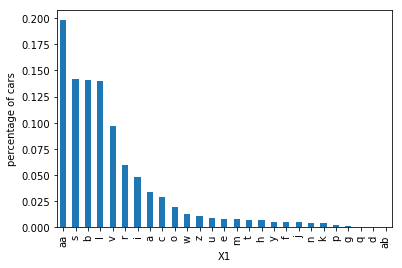

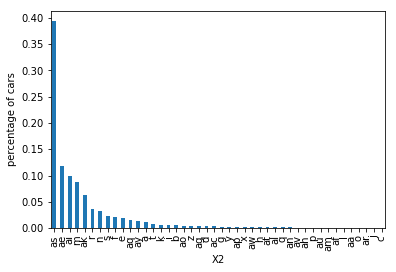

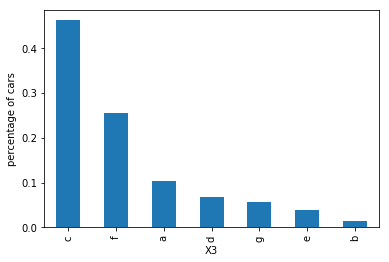

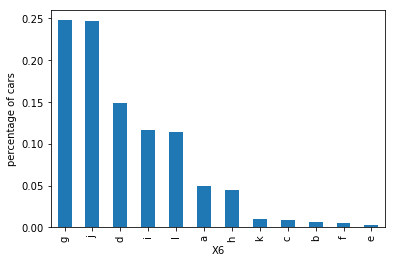

In [6]:
# let's plot how frequently each label appear in the dataset, for each of the categorical variables

total_cars = len(data)
for col in cols_to_use:
    temp_df = pd.Series(data[col].value_counts() / total_cars)
    fig = temp_df.sort_values(ascending=False).plot.bar()
    fig.set_xlabel(col)
    fig.set_ylabel('percentage of cars')
    plt.show()

We can see that for each of the above variables, some labels appear for more than 10% of the observations in the dataset, but very many appear in less than 10% or even 5% of the observations. These are infrequent labels (Rare Values), and could cause over-fitting.


In [7]:
# let's separate into training and testing set
X_train, X_test, y_train, y_test = train_test_split(data[cols_to_use].fillna(0), data.y,
                                                    test_size=0.3,
                                                    random_state=0)
X_train.shape, X_test.shape

((2946, 4), (1263, 4))

In [8]:
# let's automate the replacement of infrequent categories for the label 'rare' in all
# categorical variables as we have been doing so far (i.e., by rare or frequent label imputation)

for col in cols_to_use:
    # find non-rare categories:those are the ones we will keep 
    total_cars = len(X_train)
    temp_df = pd.Series(X_train[col].value_counts() / total_cars)
    categories_to_keep = temp_df[temp_df>=0.1].index # non-rare labels
    
    # group observations with infrequent labels under the most frequent label 
    # find frequent label
    frequent_cat = X_train.groupby(col)[col].count().sort_values().tail(1).index.values[0]
       
    # group observations with infrequent labels under new label "Rare"
    # train set
    X_train[col+'_rare_imp'] = np.where(X_train[col].isin(categories_to_keep), X_train[col], 'rare')
    X_test[col+'_rare_imp'] = np.where(X_test[col].isin(categories_to_keep), X_test[col], 'rare')
       
    # replace in train set
    X_train[col+'_freq_imp'] = np.where(X_train[col].isin(categories_to_keep), X_train[col], frequent_cat)
    X_test[col+'_freq_imp'] = np.where(X_test[col].isin(categories_to_keep), X_test[col], frequent_cat)

    
X_train.head()

,X1,X2,X3,X6,X1_rare_imp,X1_freq_imp,X2_rare_imp,X2_freq_imp,X3_rare_imp,X3_freq_imp,X6_rare_imp,X6_freq_imp
3059,aa,ai,c,g,aa,aa,rare,as,c,c,g,g
3014,b,m,c,i,b,b,rare,as,c,c,i,i
3368,o,f,f,l,rare,aa,rare,as,f,f,l,l
2772,aa,as,d,j,aa,aa,as,as,rare,c,j,j
3383,v,e,c,g,rare,aa,rare,as,c,c,g,g


In [9]:
# let's make lists with the variables after the different imputed methods
# or comparatively the original variable
# so we can train random forests using these lists

cols_to_use = ['X1', 'X2','X3', 'X6']
cols_freq = [x+'_freq_imp' for x in cols_to_use]
cols_rare = [x+'_rare_imp' for x in cols_to_use]

In [10]:
[x for x in X_test.X2.unique() if x not in X_train.X2.unique()]

['ar', 'j']

There are 2 categories in the test set not present in the training set, so this will not allow us to build a random forest, somehow, we need to replace this by something else. Therefore, we see quite clearly, that even if rare label does not boost the performance of the algorithm, it is acually required to account for labels present in the test set that are not present in the training set.

In [11]:
frequent_cat = X_train.groupby('X2')['X2'].count().sort_values().tail(1).index.values[0]
frequent_cat

'as'

In [12]:
# here I will replace those 2 by the most frequent category
#so I can build the trees and be able to compare them with the other
# engineered variables

X_test['X2'] = np.where(X_test['X2'].isin(['ar', 'j']), frequent_cat, X_test['X2'])
[x for x in X_test.X2.unique() if x not in X_train.X2.unique()]

[]

Perfect, it worked, now I can continue with the random forest comparison

In [13]:
# I will build RF using the (almost) original variables
labels_to_numbers(X_train, X_test, cols_to_use)
train_rf(X_train, y_train, X_test, y_test, cols_to_use)

Train set
Random Forests mse: 73.52552796670184
Test set
Random Forests mse: 147.79694559295893


In [14]:
# or those in which the infrequent labels were grouped under the 'rare' label
labels_to_numbers(X_train, X_test, cols_rare)
train_rf(X_train, y_train, X_test, y_test, cols_rare)

Train set
Random Forests mse: 120.70163006877415
Test set
Random Forests mse: 156.60887148893417


In [15]:
# or those in which the infrequent labels were grouped under the most frequent label
labels_to_numbers(X_train, X_test, cols_freq)
train_rf(X_train, y_train, X_test, y_test, cols_freq)

Train set
Random Forests mse: 136.65168543109723
Test set
Random Forests mse: 165.94902177678532


Re-grouping the infrequent categories under the new category 'Rare' outperforms replacing the rare labels by the most frequent one (mse test 156 vs 165)  or using the original variables.

### Conclusion

Engineering of rare labels causes in many cases an increased performance of tree based machine learning methods. In addition, to get the most value from the data science / data analysis /  machine learning project, it is a good idea, whenever possible, to understand the distribution of observations among the different labels, the cardinality of the variables, and their relationship to the target.

**That is all for this demonstration. I hope you enjoyed the notebook, and see you in the next one.**

-------------------------------------------------------------------------------